IMPORT THE LIBRARIES

In [1]:
import numpy as npi;
import pandas as pdi;
import matplotlib.pyplot as plt;
from sklearn.compose import ColumnTransformer;
from sklearn.preprocessing import OneHotEncoder;
from sklearn.preprocessing import LabelEncoder;
from sklearn.impute import SimpleImputer;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score;
from collections import Counter;


Data Preprocessing

Loan_ID              0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        6
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     5
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int64
     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001002    Male      No          0      Graduate            No   
1   LP001003    Male     Yes          1      Graduate            No   
2   LP001005    Male     Yes          0      Graduate           Yes   
3   LP001006    Male     Yes          0  Not Graduate            No   
4   LP001008    Male      No          0      Graduate            No   
..       ...     ...     ...        ...           ...           ...   
94  LP001325    Male      No          0  Not Graduate            No   
95  LP001326    Male      No          0      Graduate           NaN   
96  LP001327  Female     Yes          0      Grad

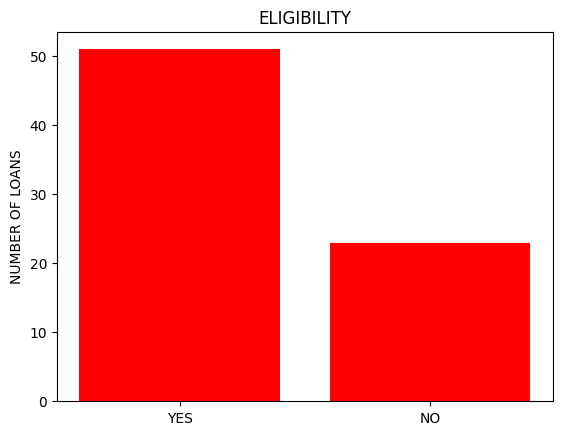



PREDICTING THE LOAN COMPLETION OVERALL PERIOD
     Loan_ID  ApplicantIncome  LoanAmount  Loan_Amount_Term Loan_Status  \
0   LP001002             5850          66                36           Y   
2   LP001005             3001          66                36           Y   
3   LP001006             2584         120                36           Y   
4   LP001008             6001         141                36           Y   
5   LP001011             5418         267                36           Y   
..       ...              ...         ...               ...         ...   
93  LP001322             4134         122                36           Y   
94  LP001325             3621          25                36           Y   
96  LP001327             2485         137                36           Y   
97  LP001333             1978          50                36           Y   
98  LP001334             4189         115                36           Y   

    year of sanctioning  
0                  2020  

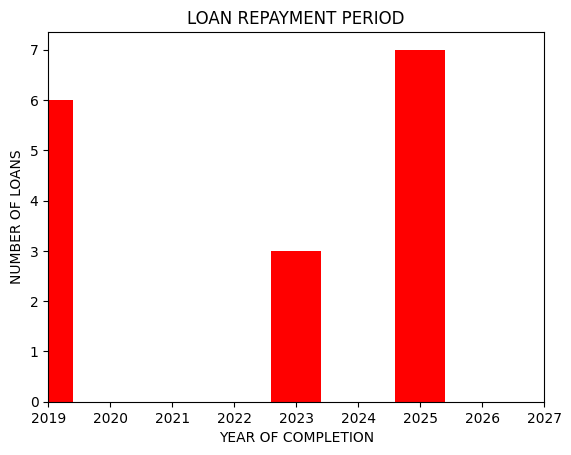

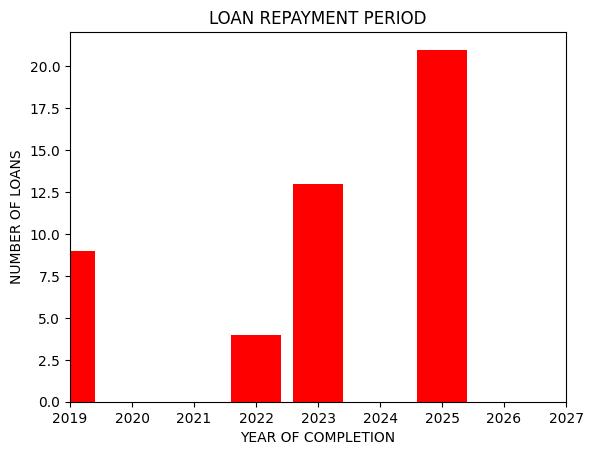

In [5]:

#reading the dataa

dfl = pdi.read_csv("loans.csv",index_col=0);
print(dfl.isnull().sum());

#making the independent and dependent variables
x= dfl.iloc[:, :-1];
q=dfl.iloc[:,-1];
print(x);
x.loc[x["Dependents"]=="3+",'Dependents']=3
print(x["Dependents"].head(10))
# getting the missing values and encoding
x["Gender"]=x["Gender"].fillna(x["Gender"].mode());
lbl= LabelEncoder();
x['Gender']=lbl.fit_transform(x['Gender']);
x['Married']=x['Married'].fillna(x['Married'].mode());
enc= LabelEncoder();
x['Married']=enc.fit_transform(x['Married']);
x['Self_Employed']=x['Self_Employed'].fillna(x['Self_Employed'].mode());
slf=LabelEncoder();
x['Self_Employed']=slf.fit_transform(x['Self_Employed']);
x['LoanAmount']=x['LoanAmount'].fillna(x['LoanAmount'].mean());
x['Loan_Amount_Term']=x['Loan_Amount_Term'].fillna(x['Loan_Amount_Term'].mean());
x['Credit_History']=x['Credit_History'].fillna(x['Credit_History'].mean());
x['Dependents'] = x['Dependents'].fillna(x['Dependents'].mode()[0]);
c=LabelEncoder();
x['Education']=c.fit_transform(x["Education"]);
print(x.isnull().sum());
print(x);
y=LabelEncoder();
x['Loan_ID']=y.fit_transform(x['Loan_ID']);
print(x['Loan_ID']);
lcq =ColumnTransformer(transformers=[("encoding",OneHotEncoder(),[11])],remainder='passthrough')
x=lcq.fit_transform(x);
print(x);

#stc = StandardScaler();
#x = stc.fit_transform(x);
#print(x);


x_train,x_test,q_train,q_test=train_test_split(x,q,test_size=0.25,random_state=1);
models=DecisionTreeClassifier(criterion='gini',random_state=1,min_samples_leaf=6);
models.fit(x_train,q_train);
q_pre=models.predict(x_test);
q7_pre=models.predict(x_train);
l= accuracy_score(q_pre,q_test);
print(l);
print(x_test[:,3]);
print(q_pre);

ctr=Counter(q_pre);
e=[ctr['Y'],ctr['N']];
e=list(map(int,e));
ctq=Counter(q7_pre);
q3=[ctq['Y'],ctq['N']];
q3=list(map(int,q3));
o=['YES','NO'];


plt.bar(o,q3,color='red');
plt.title("ELIGIBILITY")
plt.ylabel("NUMBER OF LOANS");
plt.show();




print();
print();
print("PREDICTING THE LOAN COMPLETION OVERALL PERIOD");

dfs = pdi.read_csv("loanscq.csv",index_col=0);
x1=dfs.iloc[:,6:-1];
x3=dfs.iloc[:,-1];
print(x1);
l1=LabelEncoder();
x1['Loan_Status']=l1.fit_transform(x1['Loan_Status']);
c1=LabelEncoder();
x1['Loan_ID']=c1.fit_transform(x1['Loan_ID']);
print(x1["Loan_ID"]);
x1_train,x1_test,x3_train,x3_test=train_test_split(x1,x3,test_size=0.25);
print();
print("TRAINING DATA SET");
print();
print();
print(x1_train);
q1=RandomForestRegressor(n_estimators=12,random_state=0);
q1.fit(x1_train,x3_train);
q1_pre = q1.predict(x1_test);
q7 = q1.predict(x1_train);
q1_pre=list(map(int,q1_pre));
q7=list(map(int,q7));
print();
print();
print();
print("LOAN AMOUNT ");
print(x1["LoanAmount"]);
print();
print("YEAR OF COMPLETION");
print();
print("TEST DATA SET");
print(q1_pre);
print();
print("TRAINING DATA SET");
print(q7);
a=Counter(q7);
c7=Counter(q1_pre);
x7 = x1_train["year of sanctioning"];
x1_train=npi.arange(0,len(x1_train),1);
c=x1['year of sanctioning'];
clt=[x3[x3==2019].count(),x3[x3==2020].count(),x3[x3==2021].count(),x3[x3==2022].count(),x3[x3==2023].count(),x3[x3==2024].count(),x3[x3==2025].count(),x3[x3==2026].count(),x3[x3==2027].count()];
cqt=[a[2019],a[2020],a[2021],a[2022],a[2023],a[2024],a[2025],a[2026],a[2027] ];
b=[2019,2020,2021,2022,2023,2024,2025,2026,2027];
c=[2019,2020,2021,2022,2023,2024,2025,2026,2027];
cvt=[c7[2019],c7[2020],c7[2021],c7[2022],c7[2023],c7[2024],c7[2025],c7[2026],c7[2027]];




#test dataset
plt.bar(c,cvt,color='red');
plt.xlim(2019,2027);
plt.title("LOAN REPAYMENT PERIOD")
plt.xlabel("YEAR OF COMPLETION");
plt.ylabel("NUMBER OF LOANS");
plt.show();

#training dataset
plt.bar(b,cqt,color='red');
plt.xlim(2019,2027);
plt.title("LOAN REPAYMENT PERIOD")
plt.xlabel("YEAR OF COMPLETION");
plt.ylabel("NUMBER OF LOANS");
plt.show();

